In [21]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("titanic_data.xlsx", engine='openpyxl')

# Preview the first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# Structure and datatypes
df.info()

# Summary statistics for numerical columns
df.describe()

# Count of unique values per column
df.nunique()

# Check for missing values in each column
df.isnull().sum()

# Preview last 5 rows (optional)
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [23]:
# Convert all object columns to string type to avoid mixed-type issues
df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').astype(str)

# Now safely fill missing values with mode
for col in df.select_dtypes(include='object'):
    mode_val = df[col].mode(dropna=True)
    if not mode_val.empty:
        df[col] = df[col].fillna(mode_val[0])

In [24]:
# Fill missing values for categorical columns with mode (safe way)
for col in df.select_dtypes(include='object'):
    mode_val = df[col].mode(dropna=True)
    if not mode_val.empty:
        df[col] = df[col].fillna(mode_val[0])

# Fill missing values for numeric columns with median (safe way)
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col] = df[col].fillna(df[col].median())

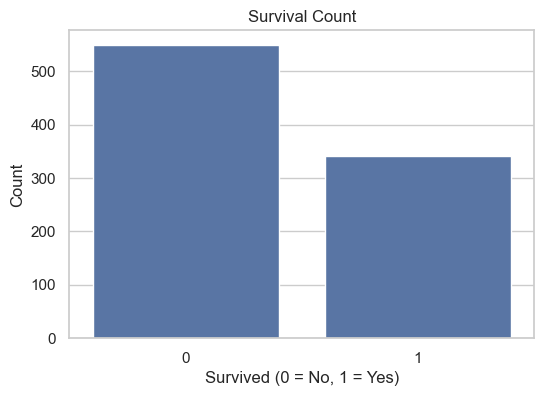

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Bar plot of Survived
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

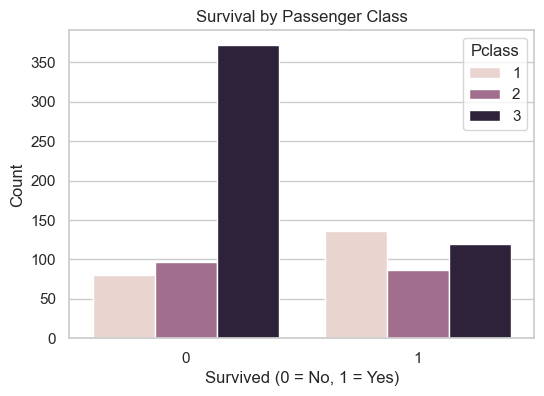

In [27]:
# Survival by Pclass (Passenger Class)
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

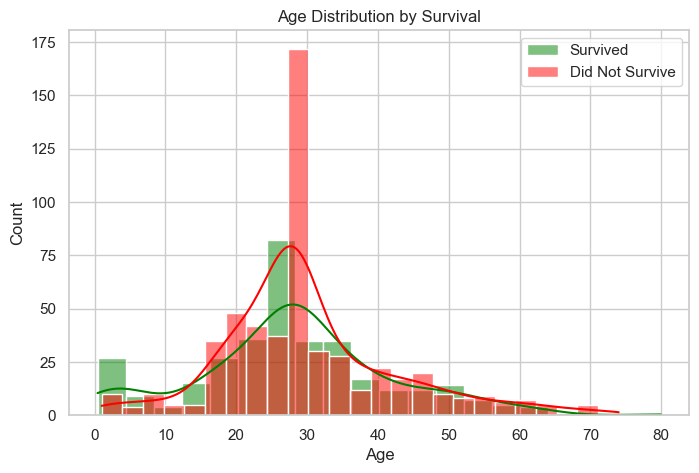

In [28]:
# Age Distribution by Survival
plt.figure(figsize=(8,5))
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, color='green', label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], kde=True, color='red', label='Did Not Survive')
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

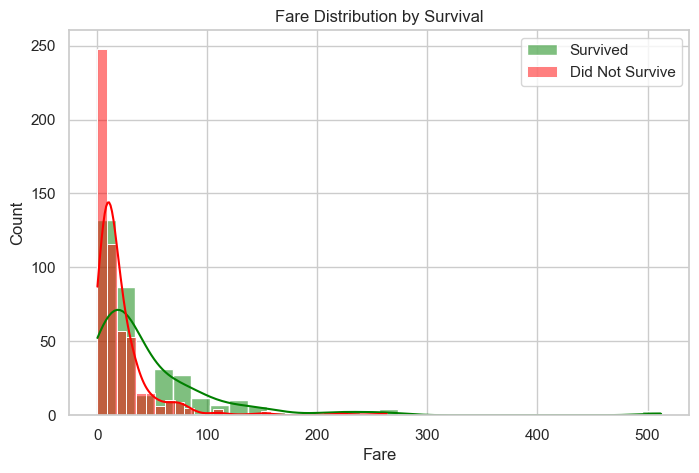

In [29]:
# Fare Distribution by Survival
plt.figure(figsize=(8,5))
sns.histplot(df[df['Survived'] == 1]['Fare'], kde=True, color='green', label='Survived', bins=30)
sns.histplot(df[df['Survived'] == 0]['Fare'], kde=True, color='red', label='Did Not Survive', bins=30)
plt.title("Fare Distribution by Survival")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.legend()
plt.show()

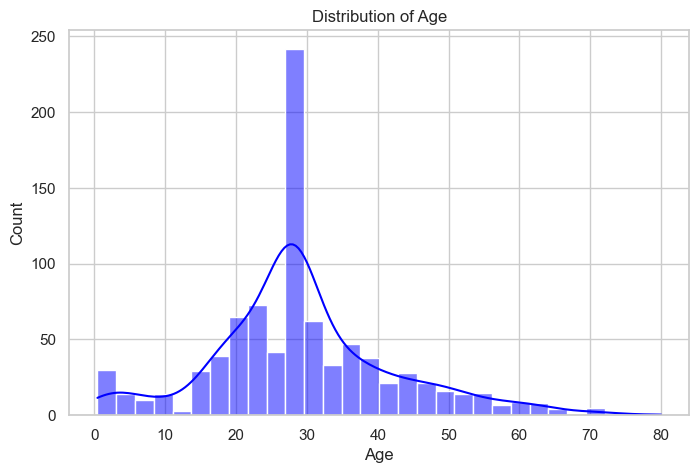

In [30]:
# Histogram for Age
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, bins=30, color='blue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

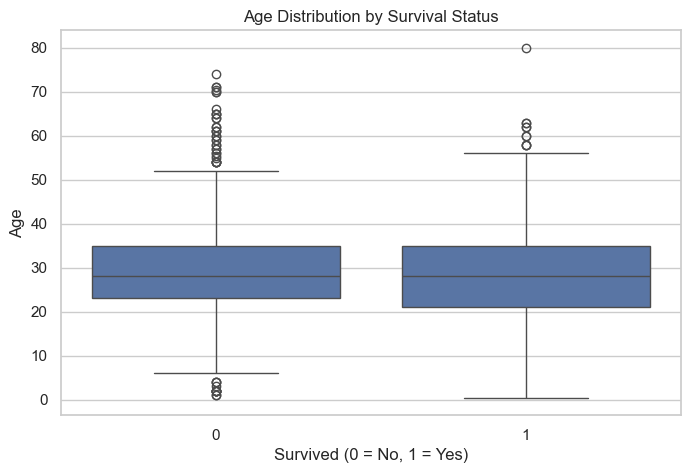

In [31]:
# Boxplot for Age
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival Status")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

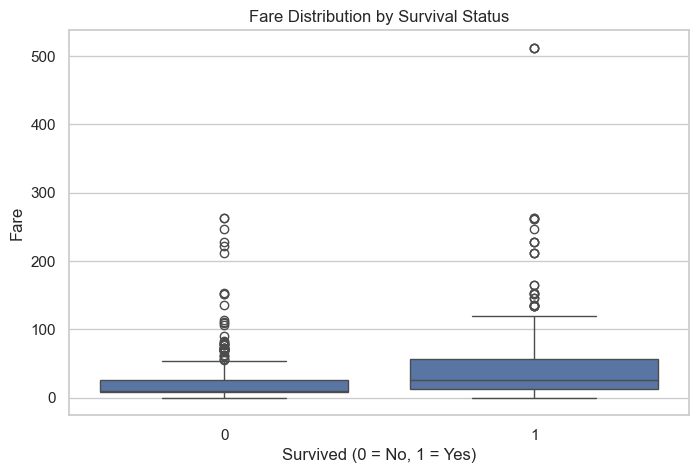

In [32]:
# Boxplot for Fare
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Distribution by Survival Status")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Fare")
plt.show()

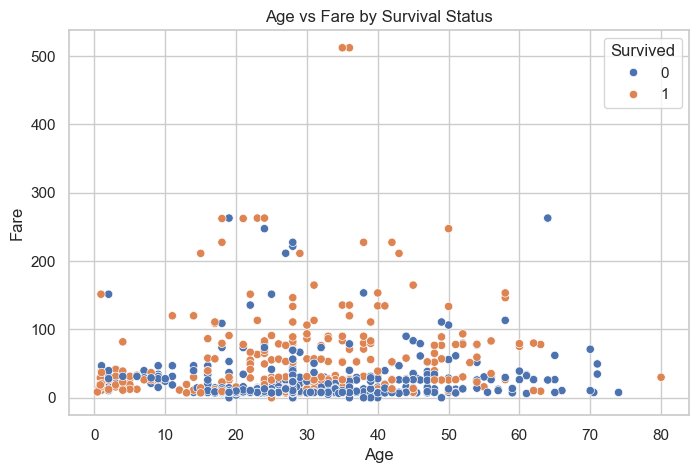

In [33]:
# Scatterplot for Age vs Fare
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Age vs Fare by Survival Status")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

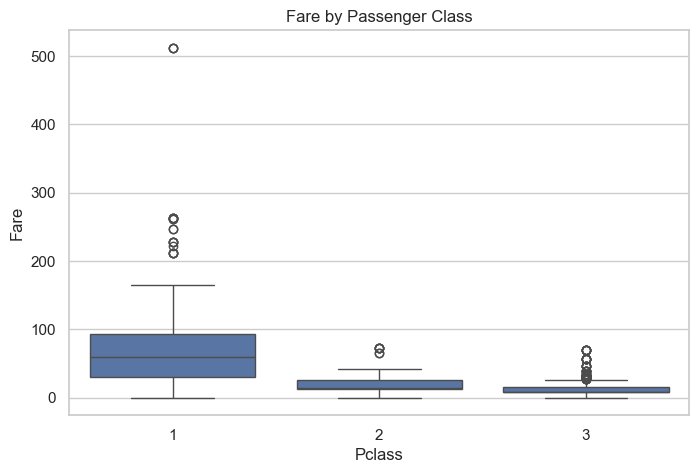

In [34]:
# Boxplot for Pclass by Survival
plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare by Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.show()

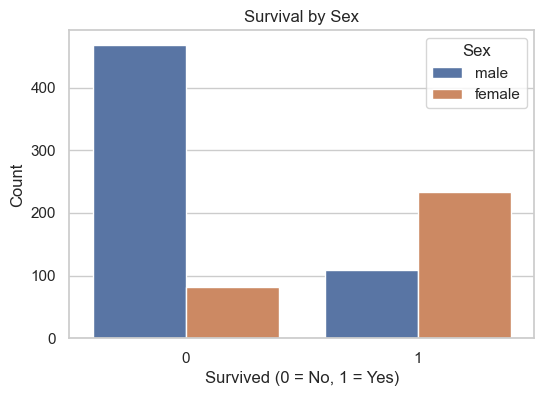

In [37]:
# Survival by Sex
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Sex")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='Survived', ylabel='FamilySize'>

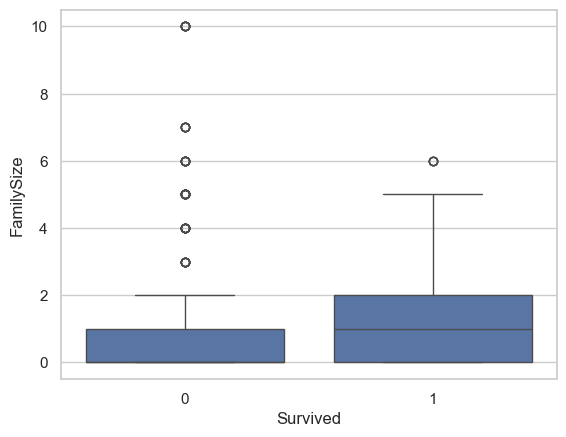

In [38]:
df['FamilySize'] = df['SibSp'] + df['Parch']
sns.boxplot(x='Survived', y='FamilySize', data=df)